In [1]:
%matplotlib inline
import numpy as np
from astropy.io.votable import parse_single_table
import matplotlib.pyplot as plt
import glob, os
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
import numpy_indexed as npi
import pysynphot as S
from extinction import ccm89, apply
import sfdmap
from astropy.io import fits
from scipy import spatial
from scipy import stats
from scipy.interpolate import interp1d
from scipy import interpolate
from kapteyn import kmpfit
from astropy.modeling.blackbody import blackbody_lambda
from astropy.table import Table
#plt.style.use('my')

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1069: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #41
	"backend      : $TEMPLATE_BACKEND
"
	in file "/Applications/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle"
	Key backend: Unrecognized backend string "$template_backend": valid strings are [u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']
  (val, error_details, msg))


In [30]:

newdata = np.rec.array([#(6564.61,'Halpha',6400.,6800.,'Halpha_br',2,5e-3,0.002,0.05,0.015,0,0,0,0.05,1),\
                        #(6564.61,'Halpha',6400.,6800.,'Halpha_na',1,1e-3,5e-4,0.002,0.01,1,1,0,0.002,1),\
                        #(6549.85,'Halpha',6400.,6800.,'NII6549',1,1e-3,2.3e-4,0.002,5e-3,1,1,1,0.001,1),\
                        #(6585.28,'Halpha',6400.,6800.,'NII6585',1,1e-3,2.3e-4,0.002,5e-3,1,1,1,0.003,1),\
                        #(6718.29,'Halpha',6400.,6800.,'SII6718',1,1e-3,2.3e-4,0.002,5e-3,1,1,2,0.001,1),\
                        #(6732.67,'Halpha',6400.,6800.,'SII6732',1,1e-3,2.3e-4,0.002,5e-3,1,1,2,0.001,1),\
                        #(4862.68,'Hbeta',4640.,5100.,'Hbeta_br',3,5e-3,0.002,0.05,0.01,0,0,0,0.01,1),\
                        #(4862.68,'Hbeta',4640.,5100.,'Hbeta_na',1,1e-3,2.3e-4,0.002,0.01,1,1,0,0.002,1),\
                        #(4960.30,'Hbeta',4640.,5100.,'OIII4959c',1,1e-3,2.3e-4,0.002,0.01,1,1,0,0.002,1),\
                        #(5008.24,'Hbeta',4640.,5100.,'OIII5007c',1,1e-3,2.3e-4,0.002,0.01,1,1,0,0.004,1),\
                        #(4960.30,'Hbeta',4640.,5100.,'OIII4959w',1,3e-3,2.3e-4,0.004,0.01,2,2,0,0.001,1),\
                        #(5008.24,'Hbeta',4640.,5100.,'OIII5007w',1,3e-3,2.3e-4,0.004,0.01,2,2,0,0.002,1),\
                        #(4687.02,'Hbeta',4640.,5100.,'HeII4687_br',1,5e-3,0.002,0.05,0.005,0,0,0,0.001,1),\
                        #(4687.02,'Hbeta',4640.,5100.,'HeII4687_na',1,1e-3,2.3e-4,0.002,0.005,1,1,0,0.001,1),\
                        #(3934.78,'CaII',3900.,3960.,'CaII3934',2,1e-3,3.333e-4,0.002,0.01,99,0,0,-0.001,1),\
                        #(3728.48,'OII',3650.,3800.,'OII3728',1,1e-3,3.333e-4,0.002,0.01,1,1,0,0.001,1),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426',1,1e-3,3.333e-4,0.002,0.01,0,0,0,0.001,1),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426_br',1,5e-3,0.0025,0.02,0.01,0,0,0,0.001,1),\
                        (2798.75,'MgII',2700.,2900.,'MgII_br',2,5e-3,0.002,0.05,0.015,0,0,0,0.05,1),\
                        (2798.75,'MgII',2700.,2900.,'MgII_na',1,1e-3,5e-4,0.002,0.01,1,1,0,0.002,1),\
                        (1908.73,'CIII',1700.,1970.,'CIII_br',2,5e-3,0.002,0.05,0.015,99,0,0,0.01,1),\
                        (1908.73,'CIII',1700.,1970.,'CIII_na',1,1e-3,5e-4,0.002,0.01,1,1,0,0.002,0),\
                        #(1892.03,'CIII',1700.,1970.,'SiIII1892',1,2e-3,0.001,0.015,0.003,3,3,0,0.005,1),\
                        #(1857.40,'CIII',1700.,1970.,'AlIII1857',1,2e-3,0.001,0.015,0.003,3,3,0,0.005,1),\
                        #(1816.98,'CIII',1700.,1970.,'SiII1816',1,2e-3,0.001,0.015,0.01,4,4,0,0.0002,1),\
                        #(1786.7,'CIII',1700.,1970.,'FeII1787',1,2e-3,0.001,0.015,0.01,4,4,0,0.0002,1),\
                        #(1750.26,'CIII',1700.,1970.,'NIII1750',1,2e-3,0.001,0.015,0.01,4,4,0,0.001,1),\
                        #(1718.55,'CIII',1700.,1900.,'NIV1718',1,2e-3,0.001,0.015,0.01,4,4,0,0.001,1),\
                        #(1549.06,'CIV',1500.,1700.,'CIV_br',2,5e-3,0.002,0.05,0.015,0,0,0,0.05,1),\
                        #(1549.06,'CIV',1500.,1700.,'CIV_na',1,1e-3,5e-4,0.002,0.01,1,1,0,0.002,0),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640',1,1e-3,5e-4,0.002,0.008,5,5,0,0.002,1),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663',1,1e-3,5e-4,0.002,0.008,5,5,0,0.002,1),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640_br',1,5e-3,0.0025,0.02,0.008,6,6,0,0.002,1),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663_br',1,5e-3,0.0025,0.02,0.008,6,6,0,0.002,1),\
                        #(1402.06,'SiIV',1290.,1450.,'SiIV_OIV1',1,5e-3,0.002,0.05,0.015,6,6,0,0.05,1),\
                        #(1396.76,'SiIV',1290.,1450.,'SiIV_OIV2',1,5e-3,0.002,0.05,0.015,6,6,0,0.05,1),\
                        #(1335.30,'SiIV',1290.,1450.,'CII1335',1,2e-3,0.001,0.015,0.01,7,7,0,0.001,1),\
                        #(1304.35,'SiIV',1290.,1450.,'OI1304',1,2e-3,0.001,0.015,0.01,7,7,0,0.001,1),\
                        #(1215.67,'Lya',1150.,1290.,'Lya_br',3,5e-3,0.002,0.05,0.02,0,0,0,0.05,1),\
                        #(1215.67,'Lya',1150.,1290.,'Lya_na',1,1e-3,5e-4,0.002,0.01,0,0,0,0.002,0)\
                        ],\
                     formats='float32,a20,float32,float32,a20,float32,float32,float32,float32,\
                     float32,float32,float32,float32,float32,float32',\
                     names='lambda,compname,minwav,maxwav,linename,ngauss,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue,fit?')
#------header-----------------
hdr = fits.Header()
hdr['lambda'] = 'Vacuum Wavelength in Ang'
hdr['minwav'] = 'Lower complex fitting wavelength range'
hdr['maxwav'] = 'Upper complex fitting wavelength range'
hdr['ngauss'] = 'Number of Gaussians for the line'
hdr['inisig'] = 'Initial guess of linesigma [in lnlambda]'
hdr['minsig'] = 'Lower range of line sigma [lnlambda]'
hdr['maxsig'] = 'Upper range of line sigma [lnlambda]'
hdr['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr['fvalue'] = 'Relative scale factor for entries w/ same findex'
hdr['fit? '] =  '1 = fit the line'
#------save line info-----------
hdu = fits.BinTableHDU(data=newdata,header=hdr,name='data')
hdu.writeto(path+'qsopar.fits',overwrite=True)


[1.5663653785164349, 1200.0, 0.0, 29.643056163964737, 1963.7435498779162, 0.0, 1.0, -2.0, 7.5379843847646256e-08, 50000.0, 0.5, 0.075258800263847861, -3.1045175533335559e-05, 3.4449436958122379e-09]


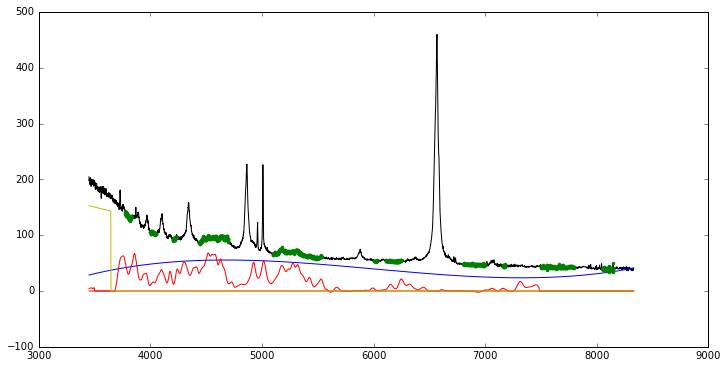

In [47]:
global path
path='/Users/legolason/study/mesfit/'

#---continuum function---------
def Fe_flux_mgii(xval,pp):
    yval = np.zeros_like(xval)
    fe_uv = np.genfromtxt(path+'fe_uv.txt')     #log10(rest wave) flux
    wave_Fe_mgii = 10**fe_uv[:,0]
    flux_Fe_mgii = fe_uv[:,1]*10**15
    Fe_FWHM = pp[1]
    xval_new = xval*(1.0 + pp[2])      
    
    ind = np.where((xval_new > 1200.) & (xval_new < 3500.), True,False)
    if ind.any() == True:
        if Fe_FWHM < 900.0:
            sig_conv = np.sqrt(910.0**2 - 900.0**2)/2./np.sqrt(2.*np.log(2.)) 
        else:
            sig_conv = np.sqrt(Fe_FWHM**2 - 900.0**2)/2./np.sqrt(2.*np.log(2.))   #in km/s
        #Get sigma in pixel space
        sig_pix = sig_conv/103.6     # 106.3 km/s is the dispersion for the BG92 FeII template
        khalfsz = np.round(4*sig_pix+1,0)
        xx= np.arange(0,khalfsz*2,1) - khalfsz
        kernel = np.exp(-xx**2/(2*sig_pix**2))
        kernel = kernel/np.sum(kernel)
        flux_Fe_conv = np.convolve(flux_Fe_mgii, kernel,'same')

        tck = interpolate.splrep(wave_Fe_mgii, flux_Fe_conv) #s  smooth pixel

        yval[ind] = pp[0]*interpolate.splev(xval_new[ind], tck)
    
    return yval

def Fe_flux_balmer(xval,pp):
    yval = np.zeros_like(xval)
    fe_op=np.genfromtxt(path+'fe_optical.txt') #log10(rest wave) flux
    wave_Fe_balmer = 10**fe_op[:,0]
    flux_Fe_balmer = fe_op[:,1]*10**15
    ind = np.where((wave_Fe_balmer > 3686.) & (wave_Fe_balmer < 7484.),True,False)
    wave_Fe_balmer = wave_Fe_balmer[ind]
    flux_Fe_balmer = flux_Fe_balmer[ind]
    Fe_FWHM = pp[1]
    xval_new = xval*(1.0 + pp[2])
    ind = np.where((xval_new > 3686.) & (xval_new < 7484.),True,False)
    if ind.any() == True:
        if Fe_FWHM < 900.0:
            sig_conv = np.sqrt(910.0**2 - 900.0**2)/2./np.sqrt(2.*np.log(2.)) 
        else:
            sig_conv = np.sqrt(Fe_FWHM**2 - 900.0**2)/2./np.sqrt(2.*np.log(2.))  #in km/s
        #Get sigma in pixel space
        sig_pix = sig_conv/106.3    # 106.3 km/s is the dispersion for the BG92 FeII template
        khalfsz = np.round(4*sig_pix+1,0)
        xx= np.arange(0,khalfsz*2,1) - khalfsz
        kernel = np.exp(-xx**2/(2*sig_pix**2))
        kernel = kernel/np.sum(kernel)
        flux_Fe_conv = np.convolve(flux_Fe_balmer, kernel,'same')
        tck = interpolate.splrep(wave_Fe_balmer, flux_Fe_conv) #s  smooth pixel
        yval[ind] = pp[0]*interpolate.splev(xval_new[ind], tck)
    return yval



def balmer_conti(xval, pp):
    # Balmer continuum from the model of Dietrich+02
    # xval = input wavelength, in units of A
    # pp=[norm, Te, tau_BE] -- in units of [--, K, --]

    lambda_BE = 3646.  # A
    bbflux = blackbody_lambda(xval,pp[1]).value*3.14 # in units of ergs/cm2/s/A
    tau = pp[2]*(xval/lambda_BE)**3
    result = pp[0]*bbflux*(1. - np.exp(-tau))
    ind = np.where(xval > lambda_BE,True,False)
    if ind.any() == True:
        result[ind]=0.
    return result

def f_poly_conti(xval, pp):
    xval2 = xval - 3000.
    yval = 0*xval2
    for i in range(len(pp)):
        yval = yval + pp[i]*xval2**(i+1)
    return yval
    
def f_conti_all(xval, pp):
    
    # pp[0]: norm_factor for the MgII Fe_template
    # pp[1]: FWHM for the MgII Fe_template
    # pp[2]: small shift of wavelength for the MgII Fe template
    # pp[3:5]: same as pp[0:2] but for the Hbeta/Halpha Fe template
    # pp[6]: norm_factor for continuum f_lambda = (lambda/3000.0)^{-alpha}
    # pp[7]: slope for the power-law continuum
    # pp[8:10]: norm, Te and Tau_e for the Balmer continuum at <3646 A
    # pp[11:*]: polynomial for the continuum
    
    
    f_Fe_MgII = Fe_flux_mgii(xval, pp[0:3])      # iron flux for MgII line region
    f_Fe_Balmer = Fe_flux_balmer(xval, pp[3:6])  # iron flux for balmer line region
    f_pl = pp[6]*(xval/3000.0)**pp[7]             # power-law continuum
    f_conti_BC = balmer_conti(xval, pp[8:11])    # Balmer continuum
    f_poly = f_poly_conti(xval, pp[11:])        # polynormal conponent for reddened spectra
    yval = f_pl + f_Fe_MgII + f_Fe_Balmer + f_poly + f_conti_BC  
    return yval

def residuals(pp, data):
    #global lastp
    xval, yval, weight = data
    lastp = pp.copy()
    #print lastp
    return (yval - f_conti_all(xval,pp))/weight

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#----line function------

def onegauss(xval, pp):
    term1 = np.exp( - (xval - pp[1])**2 / (2. * pp[2]**2) )
    yval = pp[0] * term1 / (np.sqrt(2.*np.pi) * pp[2])
    return yval

def manygauss(xval, pp):
    ngauss = int(pp.shape[0])/3
    if ngauss != 0:
        yval = 0.
        for i in range(ngauss):
            yval = yval + onegauss(xval, pp[i*3:(i+1)*3])
        return yval
    
def residuals_line(pp, data):

    xval, yval, weight = data
    return (yval - manygauss(xval,pp))/weight

#---------------------------------------------------------------------------
#Main Routine
#---------------------------------------------------------------------------
window_all = np.array([ [1150., 1170.], [1275., 1290.], [1350., 1360.], [1445., 1465.],\
                        [1690., 1705.], [1770., 1810.], [1970., 2400.], [2480., 2675.],\
                        [2925., 3400.], [3775., 3832.], [4000., 4050.], [4200., 4230.],\
                        [4435., 4700.], [5100., 5535.], [6005., 6035.], [6110., 6250.],\
                        [6800., 7000.], [7160., 7180.], [7500., 7800.], [8050., 8150.] ])

#print window_all.shape
'''
data = np.genfromtxt(path+'spec_n.txt')
z=1.529
lam = data[600:,0]
flux = smooth(data[600:,1],10)
err = data[600:,2]

'''
sp = fits.open(path+'data/lowz.fits')
data=sp[1].data

lam=10**data['loglam']
flux=data['flux']
err=1./np.sqrt(data['ivar'])
z=sp[2].data['Z']


#all in rest frame
wave = lam/(1.0+z)

tmp_all = np.array([np.repeat(False,len(lam))]).flatten()

for jj in range(len(window_all)):
    tmp = np.where( (wave > window_all[jj,0]) & (wave < window_all[jj,1]),True,False)
    tmp_all = np.any([tmp_all, tmp],axis=0)
    #print tmp_all.shape



if wave[tmp_all].shape < 10:
    print 'Continuum fitting pixel < 10.  '



pp0 = [1., 3000., 0., 1., 3000., 0., 1., -2., 0., 15000., 0.5, 0., 0., 0.]  #initial paramiters

f = kmpfit.Fitter(residuals = residuals, data = (wave, flux, err))
f.parinfo = [{'limits':(0.,10.**10)},{'limits':(1200.,10000.)},{'limits':(-0.01,0.01)},\
             {'limits':(0.,10.**10)},{'limits':(1200.,10000.)},{'limits':(-0.01,0.01)},\
             {'limits':(1.,10.**10)},{'limits':(-5.,3.)},\
             {'limits':(0.,10.**10)},{'limits':(10000.,50000.)},{'limits':(0.1,2.)},\
             None,None,None] 
                
f.fit(params0=pp0)   

'''
print "Best-fit parameters:        ", f.params
print "Asymptotic error:           ", f.xerror
print "Error assuming red.chi^2=1: ", f.stderr
print "Chi^2 min:                  ", f.chi2_min
print "Reduced Chi^2:              ", f.rchi2_min
print "Iterations:                 ", f.niter
print "Number of free pars.:       ", f.nfree
print "Degrees of freedom:         ", f.dof
'''
print f.params

# get conti result -----------------------------
conti_result=np.array([f.params[1],f.xerror[1],f.params[4],f.xerror[4],f.params[6],f.xerror[6],f.params[7],f.xerror[7],\
                       f.params[11],f.xerror[11],f.params[12],f.xerror[12],f.params[13],f.xerror[13]])
conti_result_name=np.array(['Fe_uv_FWHM','Fe_uv_FWHM_err','Fe_op_FWHM','Fe_op_FWHM_err','PL_norm','PL_norm_err','PL_slope',\
                  'PL_slope_err','POLY_a','POLY_a_err','POLY_b','POLY_b_err','POLY_c','POLY_c_err'])

'''
#-------------------------fit emiision lines-------------------------------------

f_fe_mgii_model = Fe_flux_mgii(wave,f.params[0:3])
f_fe_balmer_model = Fe_flux_balmer(wave,f.params[3:6])
f_pl_model = f.params[6]*(wave/3000.0)**f.params[7]
f_bc_model = balmer_conti(wave, f.params[8:11])
f_poly_model = f_poly_conti(wave, f.params[11:])

f_conti_model = f_pl_model + f_fe_mgii_model + f_fe_balmer_model + f_poly_model+ f_bc_model
line_flux = flux - f_conti_model




linepara=fits.open(path+'qsopar.fits')
linelist=linepara[1].data
#print linelist['lambda']

ind_kind_line=np.where((linelist['lambda'] > wave.min()) & (linelist['lambda'] < wave.max()), True,False) 

if ind_kind_line.any() == True:
    uniq_linecomp = np.unique(linelist['compname'][ind_kind_line])
    ncomp = len(uniq_linecomp)
    #print uniq_linecomp
    compname = linelist['compname']
    #print compname
    
    # loop over each complex and fit n lines simutaneously
    
    comp_result=np.array([])
    comp_result_name=np.array([])
    
    gauss_result=np.array([])
    
    gauss_result_name=np.array([])
    
    for ii in range(ncomp):
        ind_line=np.where(linelist['compname'] == uniq_linecomp[ii],True,False) # get line index
        nline_fit = np.sum(ind_line) # n line in one complex
        linelist_fit = linelist[ind_line]
        ngauss_fit = linelist_fit['ngauss'] #n gauss in each line
        #print linelist_fit
        print 'Fit line complex: '+uniq_linecomp[ii]
        #print ind_line
        #for iitmp in range(nline_fit):   # line fit together
        pxrange=[linelist_fit[0]['minwav'],linelist_fit[0]['maxwav']]   # read complex range from table
        #print pxrange
        ind_n = np.where( (wave > pxrange[0]) & (wave < pxrange[1]) ,True,False) #get the pixel index in complex region
        if np.sum(ind_n) > 10:
            
            line_fit = kmpfit.Fitter(residuals_line , data = (np.log(wave[ind_n]), line_flux[ind_n], err[ind_n]))  #fitting wavelength in ln space
            line_fit_ini = np.array([])
            line_fit_par = np.array([])
            for n in range(nline_fit):
                for nn in range(ngauss_fit[n]):
                    #print ind_line # like [False False  True  True False False]
                    #print linelist['linename'][ind_line][n]
                    #set up initial parameter guess
                    line_fit_ini0 = [1.,np.log(linelist['lambda'][ind_line][n]),linelist['inisig'][ind_line][n]]
                    line_fit_ini=np.concatenate([line_fit_ini,line_fit_ini0])
                    #set up parameter limits
                    lambda_low = np.log(linelist['lambda'][ind_line][n])-linelist['voff'][ind_line][n]
                    lambda_up = np.log(linelist['lambda'][ind_line][n])+linelist['voff'][ind_line][n]
                    sig_low = linelist['minsig'][ind_line][n]
                    sig_up = linelist['maxsig'][ind_line][n]
                    line_fit_par0 = [{'limits':(0.,10.**10)},{'limits':(lambda_low,lambda_up)},{'limits':(sig_low,sig_up)}]
                    line_fit_par = np.concatenate([line_fit_par,line_fit_par0])                        
            line_fit.parinfo = line_fit_par
            #print line_fit.parinfo
            line_fit.fit(params0=line_fit_ini)
            #print "Best-fit parameters:        ", line_fit.params
            #print "Asymptotic error:           ", line_fit.xerror
            #print "Error assuming red.chi^2=1: ", line_fit.stderr
            #print "Reduced Chi^2:              ", line_fit.rchi2_min
            #print "Iterations:                 ", line_fit.niter
            #print "Number of free pars.:       ", line_fit.nfree
            #print "Degrees of freedom:         ", line_fit.dof
            #print "status:                     ", line_fit.status
            #plt.plot(wave,manygauss(np.log(wave),line_fit.params)+f_conti_model)
            
            #----------------------get line fitting results----------------------
            #complex parameters
            comp_result_tmp=np.array([[linelist['compname'][ind_line][0]],[line_fit.status],[line_fit.chi2_min],\
                       [line_fit.rchi2_min],[line_fit.niter],[line_fit.dof]]).flatten()
            comp_result_name_tmp=np.array([str(ii+1)+'_complex_name', str(ii+1)+'_line_status',str(ii+1)+\
                                           '_line_min_chi2',str(ii+1)+'_line_red_chi2',str(ii+1)+'_niter',str(ii+1)+'_ndof'])
            comp_result=np.concatenate([comp_result,comp_result_tmp])
            comp_result_name=np.concatenate([comp_result_name,comp_result_name_tmp])
            
            #ngauss parameters  BTW  central wavelength and sigma turn to normal scale, not ln(wv)
            gauss_tmp=np.array([])
            gauss_name_tmp=np.array([])
            for gg in range(len(line_fit.params)):   
                gauss_tmp=np.concatenate([gauss_tmp,np.array([line_fit.params[gg]])])
                gauss_tmp=np.concatenate([gauss_tmp,np.array([line_fit.xerror[gg]])])
            gauss_result=np.concatenate([gauss_result,gauss_tmp])
            #print gauss_result
            for n in range(nline_fit):
                for nn in range(ngauss_fit[n]):
                    line_name=linelist['linename'][ind_line][n]+'_'+str(nn+1)
                    gauss_name_tmp_tmp=[line_name+'_scalar',line_name+'_scalar_err',line_name+'_lambda',line_name+'_lambda_err',line_name+'_fwhm',line_name+'_fwhm_err']
                    gauss_name_tmp=np.concatenate([gauss_name_tmp,gauss_name_tmp_tmp])
            gauss_result_name=np.concatenate([gauss_result_name,gauss_name_tmp])
            
        else:
            print "less than 10 pixels in line fitting!"
    #------------save continuum fitting results + line fitting results----------------
    #---------------------------------------------------------------------------------
    #print conti_result.shape
    #print conti_result_name.shape
    #print comp_result.shape
    #print comp_result_name.shape
    #print gauss_result.shape
    #print gauss_result_name.shape
    all_result=np.concatenate([conti_result,comp_result,gauss_result])
    all_result_name=np.concatenate([conti_result_name,comp_result_name,gauss_result_name])
    
    t = Table(all_result,names=(all_result_name))
    t.write('table.fits', format='fits',overwrite=True)
else:
    print "No line to fit!"
            
'''            
#--------------------------plot block------------------------------
#------------------------------------------------------------------
fig=plt.figure(figsize=(12,6))
plt.plot(wave,flux,'k')
plt.plot(wave,f.params[6]*(wave/3000.0)**f.params[7]+f_poly_conti(wave, f.params[11:]),'b')

plt.plot(wave,Fe_flux_mgii(wave,f.params[0:3]),'r')
plt.plot(wave,Fe_flux_balmer(wave,f.params[3:6]),'r')

plt.plot(wave,balmer_conti(wave, f.params[8:11]),'y')
plt.plot(wave[tmp_all],flux[tmp_all],'g.')  # plot continuum region


#plt.plot(wave,manygauss(np.log(wave),gauss_result[::2])+f_conti_model)
#for p in range(int(len(gauss_result)/6)):
#    plt.plot(wave,manygauss(np.log(wave),gauss_result[::2][p*3:(p+1)*3])+f_conti_model,'m')
#plt.plot(wave,Fe_flux_mgii(wave,f.params[0:3])+Fe_flux_balmer(wave,f.params[3:6])+\
#     f.params[6]*(wave/3000.0)**f.params[7]+f_poly_conti(wave, f.params[11:]),'r')
#plt.xlim(4500,5500)
#plt.ylim(0,50)

In [43]:
print lastp

[  1.00000000e+00   3.00000000e+03   0.00000000e+00   1.00000000e+00
   3.00000000e+03   0.00000000e+00   1.00000000e+00  -2.00000000e+00
   0.00000000e+00   1.50000000e+04   5.00000000e-01   0.00000000e+00
   0.00000000e+00   1.49011610e-08]


In [ ]:
                #if gg%3 == 1:
                #    wv=np.exp([line_fit.params[gg]])
                #    er=np.abs(wv-np.exp([line_fit.params[gg]+line_fit.xerror[gg]]))
                #    #print wv,er
                #    tmp=np.concatenate([tmp,wv])
                #    tmp=np.concatenate([tmp,er])
                #if gg%3 == 2:
                #    fwhm=2.*np.abs(np.exp([line_fit.params[gg-1]])-np.exp([line_fit.params[gg-1]+line_fit.params[gg]]))/np.exp(line_fit.params[gg-1])*300000.
                #    fwhm_err=np.abs(fwhm-2.*np.abs(np.exp([line_fit.params[gg-1]])-np.exp([line_fit.params[gg-1]+line_fit.params[gg]]+line_fit.xerror[gg]))/np.exp(line_fit.params[gg-1])*300000.)
                #    print fwhm,fwhm_err
                #if gg%3 == 0:

-11.0485 0.550755


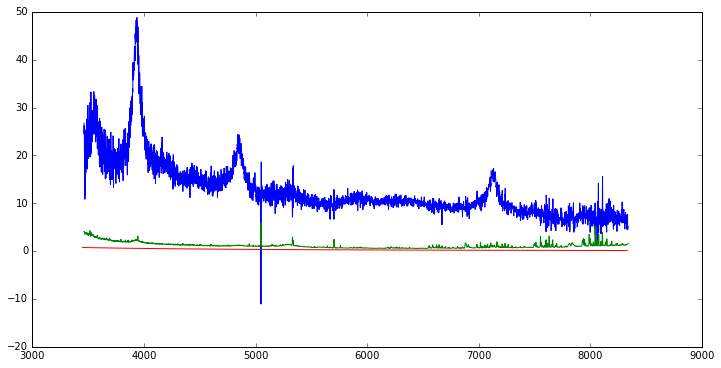

In [4]:
sp = fits.open(path+'data/medianz.fits')
data=sp[1].data

lam=10**data['loglam']
flux=data['flux']
err=1./np.sqrt(data['ivar'])

fig=plt.figure(figsize=(12,6))
plt.plot(lam/(1+z),flux)
plt.plot(lam/(1+z),err)

print flux.min(),err.min()
plt.plot(wave,f.params[6]*(wave/3000.0)**f.params[7])
#plt.plot(wave,line_flux)

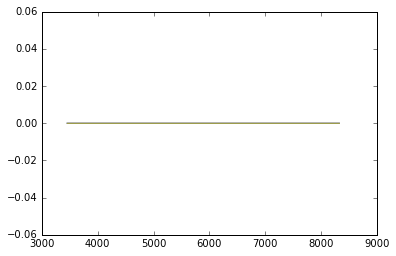

In [6]:
plt.plot(wave,f_poly_conti(wave, f.params[11:]))
plt.plot(wave,balmer_conti(wave, f.params[8:11]),'y')